In [73]:
import numpy as np
import pandas as pd


In [74]:
#import os
#for dirname, _, filenames in os.walk
#    print(dirname)

In [75]:
import os
from PIL import Image

In [76]:
from IPython.display import display  # to show the image in the notebook

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [83]:
folder_pathcloudy = "data/source/desert"

In [84]:
image_filescloud = [f for f in os.listdir(folder_pathcloudy) if f.endswith((".jpg"))]

In [85]:
image_filescloud[1]

'desert(695).jpg'

In [86]:
# for loop to get the sizes of the images
for image_file in image_filescloud:
    # Construct the full file path
    image_path = os.path.join(folder_pathcloudy, str(image_file))
    
    # Open the image
    image = Image.open(image_path)
    
    # Access image properties or perform operations
    width, height = image.size
    #print("Image size: {}x{}".format(width, height))
    
    # Close the image
    image.close()
    

In [87]:
#show the first image
first_image_path = os.path.join(folder_pathcloudy, image_filescloud[0])

    # Open the first image
first_image = Image.open(first_image_path)

    # Display the first image
first_image.show()

    # Close the image
first_image.close()




In [21]:
#show the first image in the notebook
# Open the image
#image = Image.open("data/clou/image.jpg")
#first_image = Image.open('data/cloudy/train_23953.jpg')
#first_image = first_image.convert("RGB")
# Display the image
#display(image)

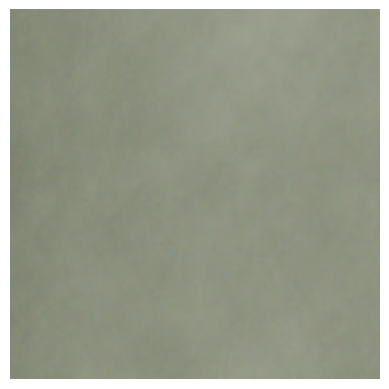

In [22]:


# Read the image file
image = mpimg.imread("data/cloudy/train_23953.jpg")

# Display the image
plt.imshow(image)
plt.axis("off")  # Optional: Turn off axis ticks and labels
plt.show()

In [26]:
# Path to the folder containing images
folder_pathcloudy
# Get a list of all the image filenames
image_filescloud = [f for f in os.listdir(folder_pathcloudy) if f.endswith((".jpg"))]
# Initialize an empty list to hold the image data
images = []
# Loop over each image
for image_filename in image_filescloud:
    # Open the image using PIL
    image = Image.open(os.path.join(folder_pathcloudy, image_filename))
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Append the image data to the list
    images.append(image_array)
# Convert the list of images to a numpy array
images = np.array(images)

In [30]:
print(display(images[1]))

array([[[125, 121, 140,   0],
        [123, 120, 138,   0],
        [121, 118, 135,   0],
        ...,
        [110, 106, 122,   0],
        [110, 106, 122,   0],
        [110, 106, 122,   0]],

       [[124, 120, 139,   0],
        [123, 119, 138,   0],
        [122, 118, 136,   0],
        ...,
        [110, 106, 123,   0],
        [111, 106, 123,   0],
        [111, 106, 123,   0]],

       [[123, 118, 138,   0],
        [123, 119, 137,   0],
        [123, 119, 137,   0],
        ...,
        [111, 106, 124,   0],
        [111, 106, 124,   0],
        [111, 106, 124,   0]],

       ...,

       [[123, 117, 139,   0],
        [123, 117, 139,   0],
        [123, 118, 138,   0],
        ...,
        [116, 110, 131,   0],
        [115, 109, 129,   0],
        [115, 109, 128,   0]],

       [[122, 116, 140,   0],
        [122, 117, 139,   0],
        [122, 117, 138,   0],
        ...,
        [114, 109, 129,   0],
        [115, 109, 129,   0],
        [115, 109, 128,   0]],

       [[121

None


In [34]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [38]:
from tqdm import tqdm
import torch.nn.parallel as parallel

In [59]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the images to a specific size
    transforms.ToTensor()
])

In [60]:
dataset = ImageFolder('data', transform=transform)

In [61]:
dataset[0][0].shape

torch.Size([3, 256, 256])

In [62]:
dataset.classes

['cloudy', 'desert', 'green_area', 'water']

In [63]:
len(dataset)

5631

In [64]:
from collections import Counter
value_counts = dict(Counter(dataset.targets))

In [65]:
value_counts = dict(zip(dataset.classes, value_counts.values()))

print(value_counts)

{'cloudy': 1500, 'desert': 1131, 'green_area': 1500, 'water': 1500}


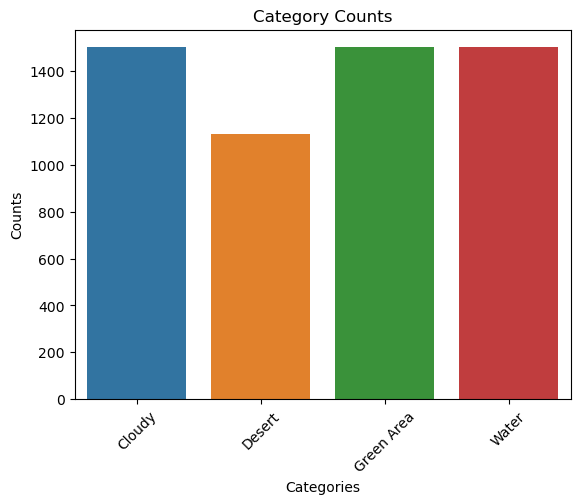

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=list(value_counts.keys()), y= list(value_counts.values()))
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Counts')
plt.xticks(range(4),labels = ["Cloudy", "Desert", "Green Area", "Water"], rotation = 45)
plt.show()

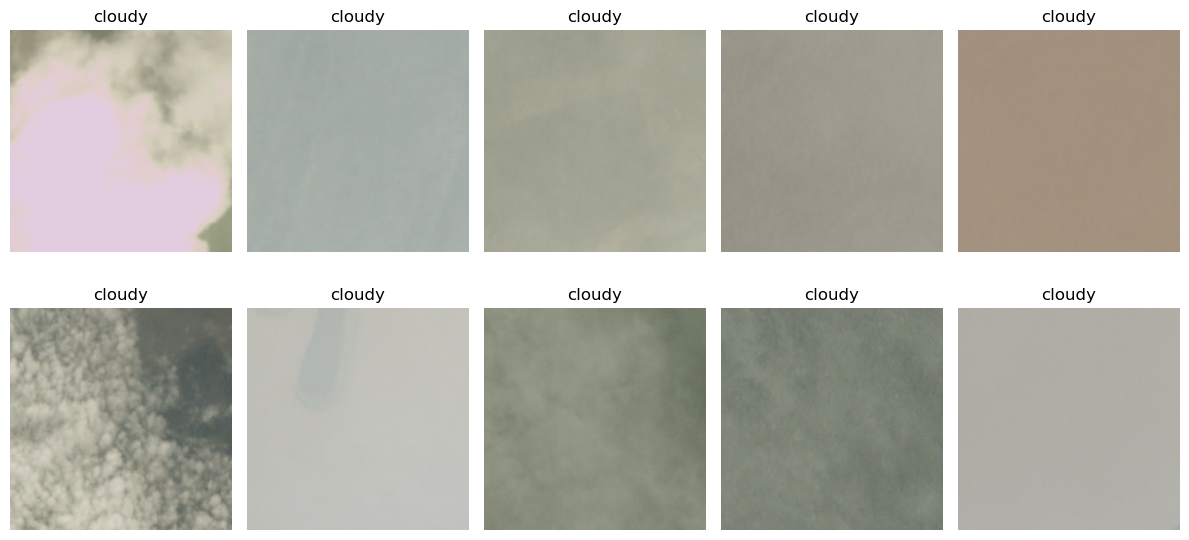

In [72]:
# Select the first 10 images from the dataset
subset_images = [dataset[i] for i in range(10)]

# Create a figure and subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

# Iterate through the subset of images and plot them
for i in range(10):
    image, label = subset_images[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(image.permute(1, 2, 0))
    ax.axis('off')
    ax.set_title(dataset.classes[label])

    
    
plt.tight_layout()
plt.show()



In [69]:
len(dataset.classes)

4

In [90]:
import os
import shutil
from sklearn.model_selection import train_test_split

# List of classes
classes = ['cloudy', 'desert', 'green_area', 'water']

# Define the paths
base_dir = os.getcwd()  # Get the current working directory
source_dir = os.path.join(base_dir, 'data/source')
train_dir = os.path.join(base_dir, 'data/train')
val_dir = os.path.join(base_dir, 'data/validate')
test_dir = os.path.join(base_dir, 'data/test')

# Create destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over classes
for class_name in classes:
    class_source_dir = os.path.join(source_dir, class_name)
    class_train_dir = os.path.join(train_dir, class_name)
    class_val_dir = os.path.join(val_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)

    # Create destination directories for each class if they don't exist
    os.makedirs(class_train_dir, exist_ok=True)
    os.makedirs(class_val_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)

    # Get the list of images in the class folder
    images = os.listdir(class_source_dir)

    # Split into train, validation, and test sets
    train_images, temp_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Move training images
    for image in train_images:
        source_path = os.path.join(class_source_dir, image)
        destination_path = os.path.join(class_train_dir, image)
        shutil.move(source_path, destination_path)

    # Move validation images
    for image in val_images:
        source_path = os.path.join(class_source_dir, image)
        destination_path = os.path.join(class_val_dir, image)
        shutil.move(source_path, destination_path)

    # Move test images
    for image in test_images:
        source_path = os.path.join(class_source_dir, image)
        destination_path = os.path.join(class_test_dir, image)
        shutil.move(source_path, destination_path)

print("Image splitting and moving completed.")


Image splitting and moving completed.


In [96]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, models, transforms
import os

# Define transforms for the training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the datasets with ImageFolder
data_dir = "data"
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'val': datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val'])
}

# Define the dataloaders
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=4, shuffle=True, num_workers=4),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=4, shuffle=True, num_workers=4)
}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pre-trained ResNet18 model from torchvision.models
model = models.resnet18(pretrained=True)

# Replace the final fully connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # Set the number of output classes

# Move the model to GPU if available
model = model.to(device)

# Define the criterion
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Define number of epochs
num_epochs = 25

# Train the model
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluation mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            # Backward pass and optimization only in training phase
            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Update statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

    print()

print('Training complete')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/wonderflow/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:14<00:00, 3.27MB/s]


Epoch 0/24
----------
train Loss: 0.5273 Acc: 0.8191
val Loss: 0.1814 Acc: 0.9520

Epoch 1/24
----------
train Loss: 0.2697 Acc: 0.9079
val Loss: 0.0528 Acc: 0.9876

Epoch 2/24
----------
train Loss: 0.1947 Acc: 0.9343
val Loss: 0.0505 Acc: 0.9840

Epoch 3/24
----------
train Loss: 0.1518 Acc: 0.9535
val Loss: 0.0440 Acc: 0.9920

Epoch 4/24
----------
train Loss: 0.1389 Acc: 0.9600
val Loss: 0.0777 Acc: 0.9769

Epoch 5/24
----------
train Loss: 0.1225 Acc: 0.9642
val Loss: 0.0390 Acc: 0.9902

Epoch 6/24
----------
train Loss: 0.1136 Acc: 0.9680
val Loss: 0.1117 Acc: 0.9583

Epoch 7/24
----------
train Loss: 0.1157 Acc: 0.9707
val Loss: 0.0482 Acc: 0.9911

Epoch 8/24
----------
train Loss: 0.1113 Acc: 0.9686
val Loss: 0.0656 Acc: 0.9796

Epoch 9/24
----------
train Loss: 0.0782 Acc: 0.9781
val Loss: 0.0163 Acc: 0.9964

Epoch 10/24
----------
train Loss: 0.0794 Acc: 0.9766
val Loss: 0.0270 Acc: 0.9911

Epoch 11/24
----------
train Loss: 0.0893 Acc: 0.9751
val Loss: 0.0366 Acc: 0.9929

Ep

KeyboardInterrupt: 

In [97]:
# Define the desired loss threshold for stopping
desired_loss = 0.1

# Initialize variables for tracking the best validation loss
best_loss = float('inf')
best_epoch = 0

# Train the model
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluation mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            # Backward pass and optimization only in training phase
            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Update statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

        # Check if the validation loss is higher than the training loss
        if phase == 'val' and epoch_loss > running_loss:
            print('Validation loss is lower than training loss. Stopping training.')
            break

        # Update the best validation loss and epoch
        if phase == 'val' and epoch_loss < best_loss:
            best_loss = epoch_loss
            best_epoch = epoch

    print()

    # Check if the loss has reached the desired threshold
    if epoch_loss <= desired_loss:
        print('Desired loss reached. Stopping training.')
        break

# Print the best validation loss and epoch
print('Best Validation Loss: {:.4f} at Epoch {}'.format(best_loss, best_epoch))

print('Training complete')

Epoch 0/24
----------
train Loss: 0.1055 Acc: 0.9716
val Loss: 0.0330 Acc: 0.9947

Desired loss reached. Stopping training.
Best Validation Loss: 0.0330 at Epoch 0
Training complete


In [98]:
# Train the model
best_loss = float('inf')  # Initialize with a large value
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)

    # Each epoch has a training and validation phase
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()  # Set model to training mode
        else:
            model.eval()   # Set model to evaluation mode

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            # Backward pass and optimization only in training phase
            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Update statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

        # Check if validation loss is higher than training loss
        if phase == 'val' and epoch_loss > best_loss:
            print("Validation loss is higher than training loss. Stopping training.")
            break

        # Update best loss if validation loss is lower
        if phase == 'val' and epoch_loss < best_loss:
            best_loss = epoch_loss

    print()

print('Training complete')

Epoch 0/24
----------
train Loss: 0.0758 Acc: 0.9796
val Loss: 0.0614 Acc: 0.9787

Epoch 1/24
----------
train Loss: 0.0773 Acc: 0.9766
val Loss: 0.1681 Acc: 0.9361
Validation loss is higher than training loss. Stopping training.

Epoch 2/24
----------
train Loss: 0.0700 Acc: 0.9802


KeyboardInterrupt: 

In [101]:
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the validation dataset
validation_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), test_transforms)
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size=4, shuffle=True, num_workers=4)


def validate(model, dataloader):
    model.eval()  # Set model to evaluate mode
    running_corrects = 0
    total_samples = 0

    # Iterate over data
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        total_samples += labels.size(0)

        # Forward pass
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        # Statistics
        running_corrects += torch.sum(preds == labels.data)

    accuracy = running_corrects.double() / total_samples

    print('Validation Acc: {:.4f}'.format(accuracy))

# Call the validation function
print("Validating the model...")
validate(model, validation_dataloader)

Validating the model...
Validation Acc: 0.9858


In [104]:
# Load the test dataset
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), test_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=4)


def test(model, dataloader):
    model.eval()  # Set model to evaluate mode
    running_corrects = 0
    total_samples = 0

    # Iterate over data
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        total_samples += labels.size(0)

        # Forward pass
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        # Statistics
        running_corrects += torch.sum(preds == labels.data)

    accuracy = running_corrects.double() / total_samples

    print('Test Acc: {:.4f}'.format(accuracy))



In [105]:
# Call the test function
print("Testing the model...")
test(model, test_dataloader)

Testing the model...
Test Acc: 0.9787


In [106]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def compute_metrics(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    # Iterate over data
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        # Save all predictions and true labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print('Confusion Matrix:')
    print(cm)

    # Compute classification report
    cr = classification_report(all_labels, all_preds, target_names=dataloader.dataset.classes)
    print('Classification Report:')
    print(cr)

# Compute metrics on test set
print("Computing metrics on test set...")
compute_metrics(model, test_dataloader)

Computing metrics on test set...
Confusion Matrix:
[[297   3   0   0]
 [  1 226   0   0]
 [  7   0 282  11]
 [  2   0   0 298]]
Classification Report:
              precision    recall  f1-score   support

      cloudy       0.97      0.99      0.98       300
      desert       0.99      1.00      0.99       227
  green_area       1.00      0.94      0.97       300
       water       0.96      0.99      0.98       300

    accuracy                           0.98      1127
   macro avg       0.98      0.98      0.98      1127
weighted avg       0.98      0.98      0.98      1127

